3


dataset of X  [2 3 4 5 6 7 8]
dataset of Y [20 23 56 78 80 90 99]
coavariance of X&Y is  56.42857142857143
B0 estimate = -6.8214285714285765
B1 estimate = 14.107142857142858
fitted line==> Y= -6.8214285714285765 + 14.107142857142858 X
Source of var        D.O.F       SS                         MS                    F
REGRESSION             2         5575.142857142858       2787.571428571429       284.4460641399417
RESIDUAL               5         49                         9.8      
--------------------------------------------------------------------------------------
TOTAL                   6         5624.142857142858      
R square value = 0.991287561279179


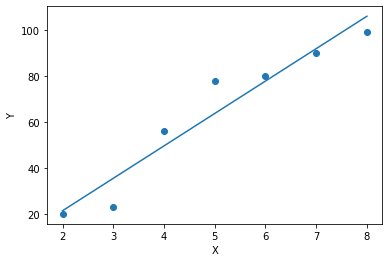

In [133]:
#def sum(filename):
 #   s=0
  #  with open(filename) as f:
   #     for line in f:
    #        s=s+float(line)
   # print('sumof ={0}'.format(s));
    
#if __name__=='__main__':
 #   sum('data.txt')
        

     #importing csv file        

    
import csv
import matplotlib.pyplot as plt
def scatter_plot(x,y):
    plt.scatter(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')
def read_csv(filename):
    X =[]
    Y =[]
    with open(filename) as f:
        reader=csv.reader(f)
        next(reader)
        for row in reader:
            X.append(int(row[0]))
            Y.append(int(row[1]))
        return X,Y
    
if __name__=='__main__':
    X,Y=read_csv('mydata.csv')
    scatter_plot(X,Y)

    
    #converting list into numpy arrays

import numpy as np
A=np.array(X)
B=np.array(Y)
print("dataset of X ",A)
print("dataset of Y",B)

    # mean of x and y as mx and my
my=sum(B)/len(B)
mx=sum(A)/len(A)

    # finding association b/w X&Y through corelation or Sxy

    
i=0
covsum=0
while(i<len(A)):
        covsum=covsum+((mx-A[i])*(my-B[i]))
        i=i+1
covxy=covsum/len(A)
print("coavariance of X&Y is ",covxy)

     # finding variance of x or Sxx and y or Syy

varsum=0
i=0
while(i<len(A)):
        varsum=varsum+((mx-A[i])*(mx-A[i]))
        i=i+1
Sxx=varsum/len(A)
varsum=0
i=0
while(i<len(A)):
        varsum=varsum+((mx-B[i])*(mx-B[i]))
        i=i+1

Syy=varsum/len(A)


     #calculating B0 and B1 estimate

B1=covxy/Sxx
B0=my-B1*mx
print("B0 estimate =",B0)
print("B1 estimate =",B1)
print("fitted line==> Y=",B0,"+",B1,"X")

     #plotting fitted line with scatter plot

B1, B0 = np.polyfit(A, B, 1)
plt.plot(A, B1*A + B0)

     # Calculate Y-estimate from fitted line
est=[]
i=0
while(i<len(B)):
        s=0
        s=B0+B1*A[i]
        est.append(int(s))
        i=i+1
Y_est=np.array(est)
     # CALCULATING SSt ,SSres,SSreg

i=0
SSreg=0
SSres=0
while(i<len(B)):
        SSreg=SSreg+(Y_est[i]-my)*(Y_est[i]-my)
        SSres=(B[i]-Y_est[i])*(B[i]-Y_est[i])
        i=i+1
SSt=SSres+SSreg
 
     
        #ANOVA
n=len(A)       
print("Source of var","     "," D.O.F","     ","SS","                       ","MS","                  ","F")
print("REGRESSION","           ","2","       ",SSreg,"     ",SSreg/2,"     ",(SSreg/2)/(SSres/(n-2)))
print("RESIDUAL","             ",n-2,"       ",SSres,"                       ",SSres/(n-2),"     ")    
print("--------------------------------------------------------------------------------------")
print("TOTAL","                 ",n-1,"       ",SSt,"     ")

    # R square value
print("R square value =",1-(SSres/SSt))    
 